# ABOUT:
- this notebook **conducts pairs t tests and performs visualisations** of the experiment results to explore whether AmpBPR Loss functions improves GNN performance on CF task

In [9]:
import seaborn as sb
import pandas as pd
import re
import scipy.stats as stats
from collections import defaultdict
from numpy import array

In [7]:
def process_experiment_data(df):
    cols = [col for col in df.columns if "MIN" not in col and "MAX" not in col]
    return df[cols]

def parse_colname(colname):
    loss_type, neg_weight, _, metric = re.findall(r"experiment_([\w]+)_([\.\d]+)_([\.\d]+) - ([\w]+)", colname)[0]
    return loss_type, neg_weight, metric

# extract data for t test
def extract_paired_samples(df, treatment, original):
    pairs = defaultdict(list)
    for col in df.columns[1:]:
        loss_type, neg_weight, metric = parse_colname(col)
        if loss_type==treatment or loss_type==original:
            best_value = df[col].max()
            pairs[neg_weight].append(best_value)
    treatment, control = array(list(pairs.values())).T
    return treatment, control

# extract data for visualization
def extract_for_visualization(df):
    output = defaultdict(list)
    for col in df.columns[1:]:
        loss_type, neg_weight, metric = parse_colname(col)
        output[loss_type].append(df[col].tolist())
    
    for key in output:
        output[key] = array(output[key]).mean(axis = 0)
    return output

# extract data for neg_weight_analysis
def extract_for_neg_weight_analysis(df, treatment, original):
    pairs = defaultdict(list)
    for col in df.columns[1:]:
        loss_type, neg_weight, metric = parse_colname(col)
        if loss_type==treatment or loss_type==original:
            best_value = df[col].max()
            pairs[neg_weight].append(best_value)
    treatment, control = array(list(pairs.values())).T
    neg_weights = list(pairs.keys())
    return neg_weights, treatment, control

In [3]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code1\results\lightgcn_loss_function_study_precision_values.csv"
data = pd.read_csv(path)
data = process_experiment_data(data)
data

,Step,experiment_AmpBPR2_1.5302548366951503_0.0 - precision,experiment_AmpBPR1_1.5302548366951503_0.0 - precision,experiment_OriginalBPR_1.5302548366951503_0.0 - precision,experiment_AmpBPR2_1.7672886054282924_0.0 - precision,experiment_AmpBPR1_1.7672886054282924_0.0 - precision,experiment_OriginalBPR_1.7672886054282924_0.0 - precision,experiment_AmpBPR2_1.5606823473502276_0.0 - precision,experiment_AmpBPR1_1.5606823473502276_0.0 - precision,experiment_OriginalBPR_1.5606823473502276_0.0 - precision,...,experiment_OriginalBPR_1.6492323458331901_0.0 - precision,experiment_AmpBPR2_1.2157148817244199_0.0 - precision,experiment_AmpBPR1_1.2157148817244199_0.0 - precision,experiment_OriginalBPR_1.2157148817244199_0.0 - precision,experiment_AmpBPR2_1.620738465927356_0.0 - precision,experiment_AmpBPR1_1.620738465927356_0.0 - precision,experiment_OriginalBPR_1.620738465927356_0.0 - precision,experiment_AmpBPR2_1.5488135039273248_0.0 - precision,experiment_AmpBPR1_1.5488135039273248_0.0 - precision,experiment_OriginalBPR_1.5488135039273248_0.0 - precision
0,4,0.209836,0.199344,0.205246,0.223934,0.216393,0.215246,0.193279,0.180000,0.192787,...,0.204754,0.201803,0.201803,0.199344,0.213279,0.212295,0.208852,0.190820,0.182295,0.171967
1,9,0.236557,0.217377,0.209672,0.243607,0.229180,0.222787,0.213443,0.197869,0.197869,...,0.209836,0.206066,0.208689,0.211639,0.235410,0.225410,0.220984,0.211311,0.191311,0.188033
2,14,0.252623,0.238689,0.219836,0.257049,0.248525,0.236721,0.232131,0.216721,0.221148,...,0.229016,0.225410,0.224262,0.227869,0.254918,0.235902,0.234098,0.233279,0.217869,0.217869
3,19,0.263279,0.250164,0.245082,0.270164,0.256393,0.253770,0.244590,0.239836,0.237541,...,0.242787,0.240492,0.236230,0.237049,0.267377,0.238197,0.244426,0.238361,0.234754,0.228033
4,24,0.258361,0.248033,0.250820,0.276230,0.263443,0.261803,0.245902,0.240328,0.242459,...,0.251311,0.245738,0.243934,0.250984,0.264918,0.246557,0.252131,0.244098,0.231967,0.237213
5,29,0.257213,0.248689,0.253934,0.277213,0.254426,0.265410,0.250000,0.240492,0.239672,...,0.247869,0.246557,0.245902,0.257213,0.263279,0.252623,0.255246,0.244098,0.236885,0.240000
6,34,0.257705,0.246393,0.258689,0.273770,0.261148,0.270328,0.252623,0.246885,0.246393,...,0.250656,0.250492,0.249344,0.257213,0.270328,0.252459,0.264262,0.244590,0.239836,0.239180
7,39,0.255246,0.244590,0.259672,0.279016,0.256557,0.270000,0.249016,0.241967,0.249180,...,0.252131,0.260820,0.249016,0.259672,0.268033,0.248852,0.259836,0.245574,0.236393,0.243279
8,44,0.255082,0.248033,0.257869,0.278197,0.255082,0.273443,0.248852,0.242459,0.246066,...,0.249344,0.256557,0.249672,0.249836,0.265902,0.249344,0.258033,0.247213,0.241639,0.243934
9,49,0.257705,0.243115,0.254590,0.279016,0.253770,0.268525,0.247377,0.243934,0.245246,...,0.247049,0.254754,0.244754,0.253279,0.266230,0.248852,0.259672,0.244918,0.235574,0.242787


## t test: AmpBPR1
- H0: AmpBPR1==OriginalBPR, H1: AmpBPR1>OriginalBPR
- No evidence that AmpBPR1 improves performance

In [159]:
treatment, control = extract_paired_samples(data, "AmpBPR1", "OriginalBPR")

In [160]:
stats.ttest_rel(treatment, control, alternative = "greater")

Ttest_relResult(statistic=-3.746902549962932, pvalue=0.9977117549794168)

## t test: AmpBPR2
- H0: AmpBPR2==OriginalBPR, H1: AmpBPR2>OriginalBPR
- significant evidence that AmpBPR2 improve performance over OriginalBPR

In [161]:
treatment, control = extract_paired_samples(data, "AmpBPR2", "OriginalBPR")

In [162]:
stats.ttest_rel(treatment, control, alternative = "greater")

Ttest_relResult(statistic=5.556791453349932, pvalue=0.00017666430890840904)

## Compare performance by lineplot

In [10]:
visual_data = extract_for_visualization(data)
tmp = pd.DataFrame(visual_data)
tmp["eval_step"] = tmp.index
tmp = pd.melt(tmp, id_vars = "eval_step", value_vars = ["AmpBPR2", "AmpBPR1", "OriginalBPR"])

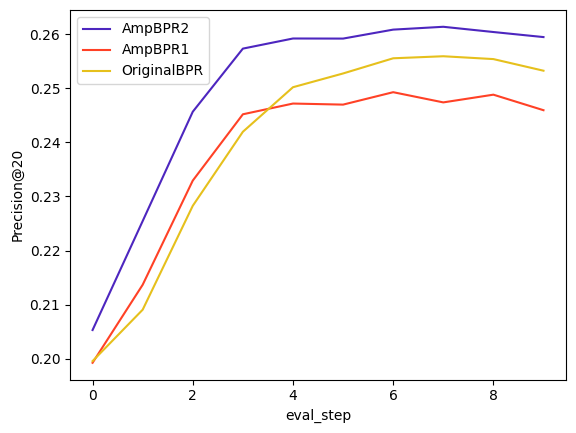

In [13]:
p = sb.lineplot(data = tmp, x = "eval_step", y = "value", hue = "variable", palette = "CMRmap")
p.set(ylabel = "Precision@20")
p.legend(title = "")

## Effect of negative item weight

In [14]:
neg_weights, treatment, control = extract_for_neg_weight_analysis(data, "AmpBPR2", "OriginalBPR")
tmp = pd.DataFrame({"neg_weights": neg_weights, "treatment": treatment, "control": control})
tmp['neg_weights'] = tmp['neg_weights'].astype(float)

[Text(0.5, 0, 'Negative Item Weights'),
 Text(0, 0.5, 'Percentage Improvement in Precision@20')]

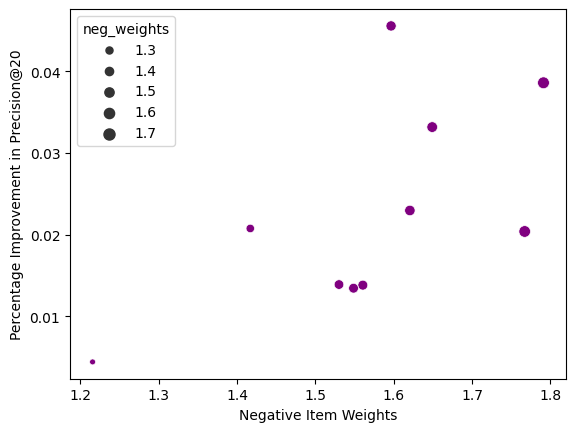

In [15]:
p = sb.scatterplot(data = tmp, x = "neg_weights", y = (tmp["treatment"] - tmp["control"])/tmp["control"], size = "neg_weights", color = "purple")
p.set(xlabel = "Negative Item Weights", ylabel = "Percentage Improvement in Precision@20")

# Other plots

In [226]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code1\results\lightgcn_loss_function_study_recall_values.csv"
data = pd.read_csv(path)
data = process_experiment_data(data)

In [217]:
visual_data = extract_for_visualization(data)
tmp = pd.DataFrame(visual_data)
tmp["eval_step"] = tmp.index
tmp = pd.melt(tmp, id_vars = "eval_step", value_vars = ["AmpBPR2", "AmpBPR1", "OriginalBPR"])

## Recall Comparison

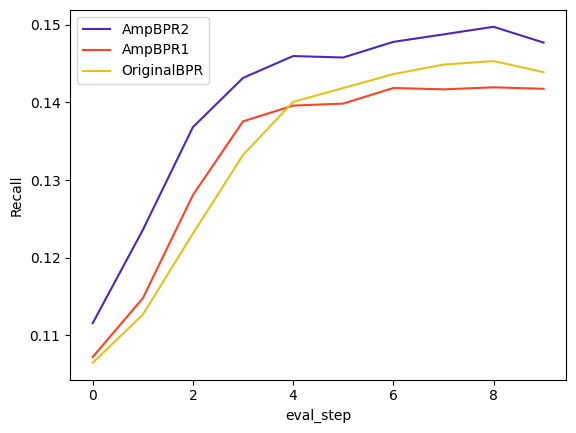

In [219]:
p = sb.lineplot(data = tmp, x = "eval_step", y = "value", hue = "variable", palette = "CMRmap")
p.set(ylabel = "Recall")
p.legend(title = "")

In [223]:
path = r"C:\Users\tanch\Documents\NTU\NTU Year 4\FYP - GNN\code1\results\lightgcn_loss_function_study_loss_values.csv"
data = pd.read_csv(path)
data = process_experiment_data(data)

In [224]:
visual_data = extract_for_visualization(data)
tmp = pd.DataFrame(visual_data)
tmp["eval_step"] = tmp.index
tmp = pd.melt(tmp, id_vars = "eval_step", value_vars = ["AmpBPR2", "AmpBPR1", "OriginalBPR"])

## Loss Comparison

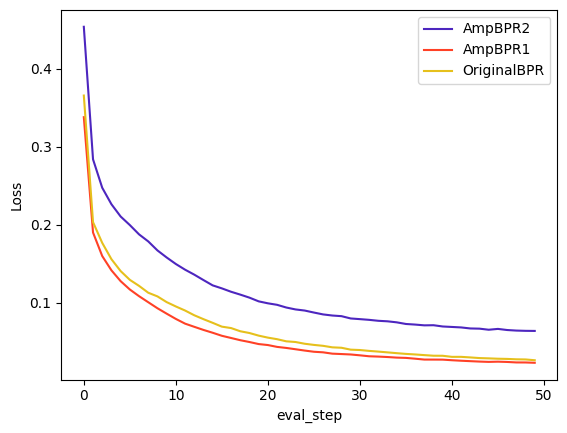

In [225]:
p = sb.lineplot(data = tmp, x = "eval_step", y = "value", hue = "variable", palette = "CMRmap")
p.set(ylabel = "Loss")
p.legend(title = "")